Trabajo Práctico N° 1

#Data aqcuisition

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("CMEs.csv")
df = df.set_index("Origin")
print(df)
print(df.shape)


#Pre-processing

In [120]:
#Agrego un vector con los números de la clasificacion de flares y no flares
ClaseBoolean = (df.index == "flare") #Hago un vector que tome true=la categoria que quiero
ClaseBoolean = (ClaseBoolean*1)#Lo transformo a numero, tomo "no flare = 0", "flare = 1"
df.insert(2,"categoriaTarget", ClaseBoolean)


In [ ]:
print(df)

In [ ]:
categoriaSunActivity = {"high": 1, "low":-1}
df["SunActivity"] = df["SunActivity"].map(categoriaSunActivity) 
df["SunActivity"]

In [ ]:
print(df)

#Feature engineering

In [ ]:
balanceDatos = df["categoriaTarget"].value_counts()
print(balanceDatos)

In [ ]:
# Hay 13 unos de mas, los quito
counter = 13
dfAux = pd.DataFrame()
for index,row in df.iterrows():
  if(counter>0):
    if(row["categoriaTarget"]==1):
      counter-=1
    else:
       dfAux = dfAux.append(row)
  else:
    dfAux = dfAux.append(row)
    
dfAux.shape

In [ ]:
balanceDatosPost = dfAux["categoriaTarget"].value_counts()
print(balanceDatosPost)

#Data preparation

In [127]:
features = dfAux.loc[:, dfAux.columns != "categoriaTarget"]
target = dfAux.loc[:, dfAux.columns == "categoriaTarget"]

In [ ]:
features.shape
print(features)

In [ ]:
target.shape
print(target)

In [ ]:
features.min()
features.max()

In [131]:
from sklearn.model_selection import train_test_split

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)
features_train.shape

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler = MinMaxScaler()

#features_train = features_train.to_numpy()
#features_train = features_train.reshape((-1,1))
#features_train_scaled = scaler.fit_transform(features_train)

features_train_scaled = scaler.fit_transform(features_train)

In [ ]:
features_train_scaled.shape

In [ ]:
print(features_train_scaled)

In [137]:
#features_test = features_test.to_numpy()
#features_test = features_test.reshape((-1,1))
features_test_scaled = scaler.transform(features_test)

In [ ]:
features_test_scaled.shape

#Modeling

In [139]:
from keras.models import Sequential
from keras.layers.core import Activation, Dense
import tensorflow as tf

In [ ]:
myInputSize = features_train_scaled.shape[1]
print(myInputSize)

In [141]:
myInputSize = features_train_scaled.shape[1]

#arquitectura red neuronal
model = Sequential()
model.add(Dense(20, input_dim = myInputSize))
model.add(Activation("tanh"))
model.add(Dense(1))
model.add(Activation("relu"))

model.compile(loss= "binary_crossentropy", optimizer = "rmsprop", metrics = [tf.keras.metrics.Accuracy()])
#model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics=['binary_accuracy'])

In [ ]:
history = model.fit(features_train_scaled, target_train, epochs = 50, validation_split = 0.2)

In [143]:
from matplotlib import pyplot as plt

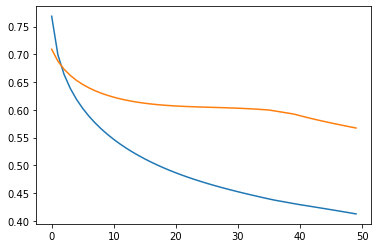

In [144]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

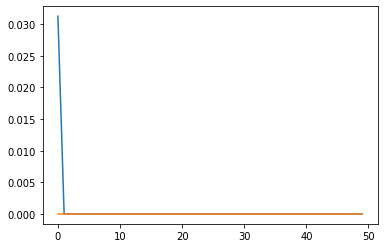

In [145]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

#Classification and validation

In [146]:
yPred = model.predict(features_test)

In [147]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(np.round(yPred), target_test, labels=[0.0, 1.0])

In [148]:
print(cm)

[[0 0]
 [6 5]]
